# 🚀 NetworkX Workshop
## Session 1
### Special thanks to Mr. Yahya Hematyar Tabatabaei, whose insightful NetworkX workshop inspired and guided the creation of this notebook

# 🧠 Welcome to the NetworkX Workshop!

This notebook is read-only.

👉 To work on it, click `File → Save a copy in Drive`.  
This will create your own editable version in Google Drive.

Happy coding! 🚀

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tabatabaeiphys/NetworkX/blob/main/netx1.ipynb)





This tutorial will cover:
- Creating graphs in NetworkX
- Working with weighted and directed graphs
- Using edge and node attributes
- MultiGraphs and Bipartite graphs
- adjacency matrix and clustering coefficient


## importing needed libraries

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Creating Graphs

You can create undirected and directed graphs using NetworkX. Here's how to add nodes and edges.


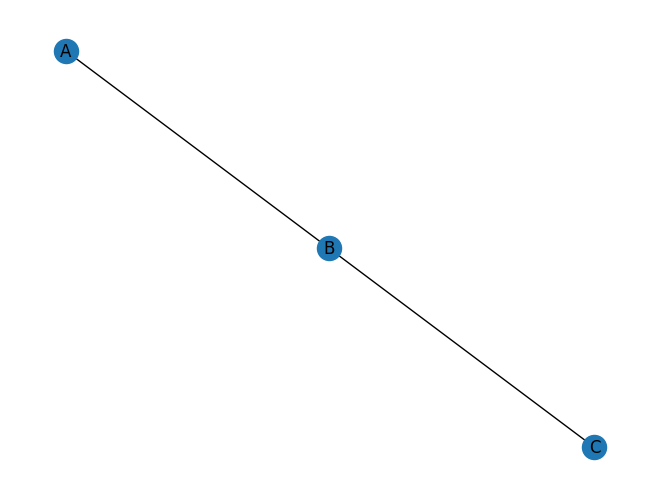

In [3]:
# Create an undirected graph
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('C', 'B')
# Plot the graph
nx.draw(G, with_labels=True)
plt.show()


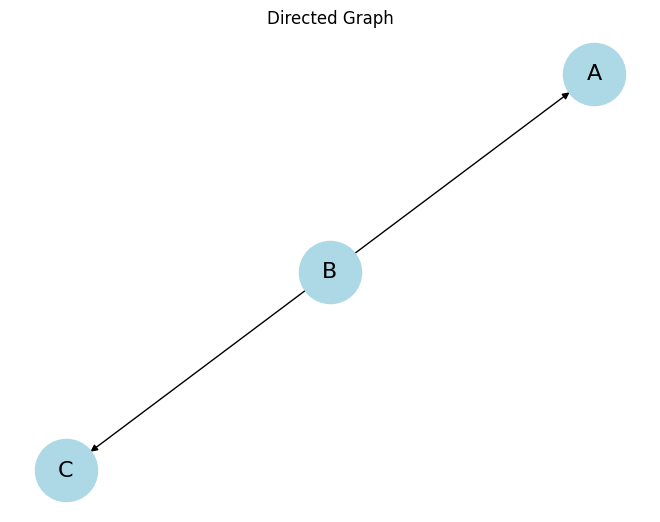

In [4]:

# Create a directed graph
G = nx.DiGraph()
G.add_edge('B', 'A')
G.add_edge('B', 'C')

# Plot the directed graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, arrows=True)
plt.title('Directed Graph')
plt.show()



### Weighted Networks

NetworkX allows adding weights and signs to edges to represent relationships such as distances or capacities.


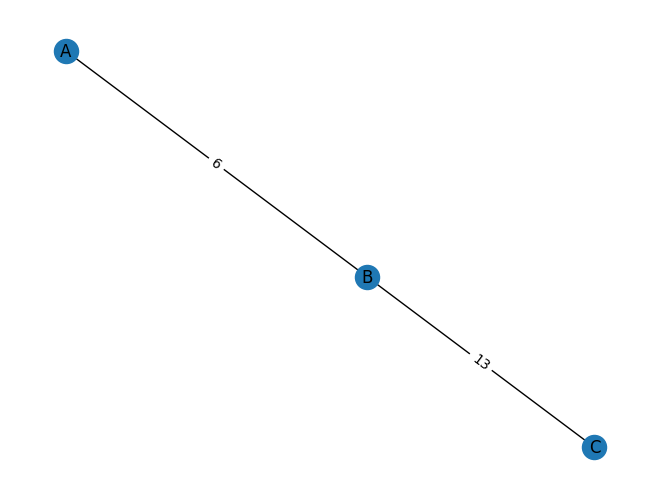

In [11]:
# Creating a weighted graph
G = nx.Graph()
G.add_edge('A', 'B', weight=6)
G.add_edge('C', 'B', weight=13)

# Visualize the weighted graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


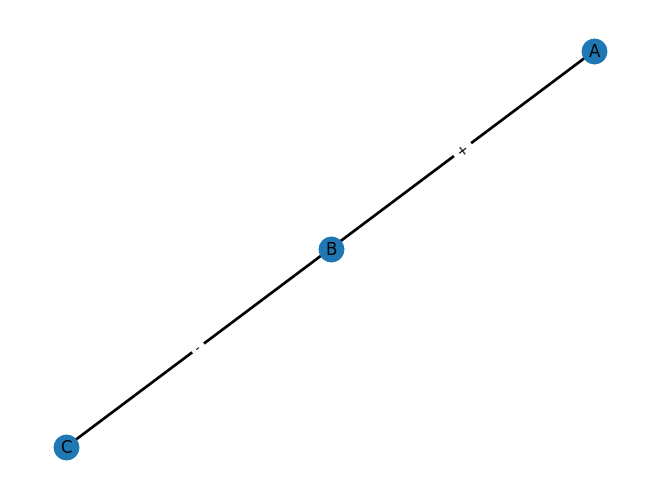

In [13]:
# Create the graph with signed edges
G = nx.Graph()
G.add_edge('A', 'B', sign="+")   # Positive edge
G.add_edge('C', 'B', sign="-")   # Negative edge

# Position the nodes
pos = nx.spring_layout(G)

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True)

# Get the signs of the edges
signs = nx.get_edge_attributes(G, 'sign')

# Create edge labels with + or - based on the sign attribute
#edge_labels = {edge: sign for edge, sign in signs.items()}
edge_labels = {}
for edge, sign in signs.items():
    edge_labels[edge] = sign

# Draw the edges without color change (default color)
nx.draw(G, pos, width=2)

# Draw the + or - signs as edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.show()


### Node and Edge Attributes

Nodes and edges can have additional attributes, such as roles or relationships.


In [14]:
# Add node and edge attributes
G = nx.Graph()
G.add_node('A', role='Trader')
G.add_node('C', role='Manager')
G.add_edge('A', 'B', relation='Family', weight=6)

# Accessing node attributes
print(G.nodes(data=True))

# Accessing edge attributes
print(G.edges(data=True))

[('A', {'role': 'Trader'}), ('C', {'role': 'Manager'}), ('B', {})]
[('A', 'B', {'relation': 'Family', 'weight': 6})]


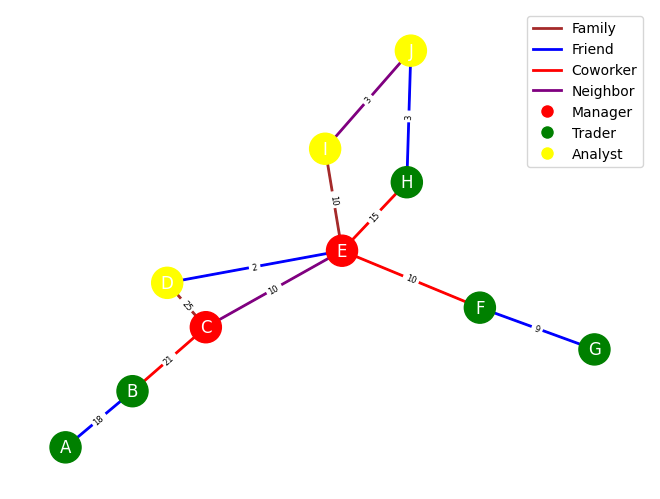

In [15]:
from matplotlib.lines import Line2D

# Create a Graph with different relations and weights (only one edge per pair)
G = nx.Graph()
G.add_edge('A', 'B', relation='Friend', weight=18)
G.add_edge('B', 'C', relation='Coworker', weight=21)
G.add_edge('C', 'D', relation='Family', weight=25)
G.add_edge('C', 'E', relation='Neighbor', weight=10)
G.add_edge('E', 'D', relation='Friend', weight=2)
G.add_edge('E', 'F', relation='Coworker', weight=10)
G.add_edge('F', 'G', relation='Friend', weight=9)
G.add_edge('I', 'E', relation='Family', weight=10)
G.add_edge('H', 'E', relation='Coworker', weight=15)
G.add_edge('I', 'J', relation='Neighbor', weight=3)
G.add_edge('J', 'H', relation='Friend', weight=3)

# Define node roles and their colors
node_roles = {'A': 'Trader', 'B': 'Trader', 'C': 'Manager', 'D': 'Analyst', 'E': 'Manager', 
              'F': 'Trader', 'G': 'Trader', 'H': 'Trader', 'I': 'Analyst', 'J': 'Analyst'}

role_colors = {'Manager': 'red', 'Trader': 'green', 'Analyst': 'yellow'}
node_colors = [role_colors[node_roles[node]] for node in G.nodes]

# Define edge colors based on the relation attribute
relation_colors = {'Family': 'brown', 'Friend': 'blue', 'Coworker': 'red', 'Neighbor': 'purple'}
edge_colors = [relation_colors[G[u][v]['relation']] for u, v in G.edges()]

# Define positions of nodes using spring layout
pos = nx.spring_layout(G)

# Draw the nodes with their respective colors
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_color='white')

# Draw the edges with the assigned colors
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

# Draw the weight on each edge and combine relation & weight labels
edge_labels = {(u, v): (G[u][v]['weight']) for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=6)

# Create a legend for the edge colors (relations)
legend_elements_edges = [
    Line2D([0], [0], color='brown', lw=2, label='Family'),
    Line2D([0], [0], color='blue', lw=2, label='Friend'),
    Line2D([0], [0], color='red', lw=2, label='Coworker'),
    Line2D([0], [0], color='purple', lw=2, label='Neighbor')
]

# Create a legend for the node colors (roles)
legend_elements_nodes = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Manager'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Trader'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Analyst')
]

# Add the legends to the plot
plt.legend(handles=legend_elements_edges + legend_elements_nodes, loc='best')

plt.show()


### MultiGraphs

A `MultiGraph` allows multiple edges between two nodes, each with its own attributes.


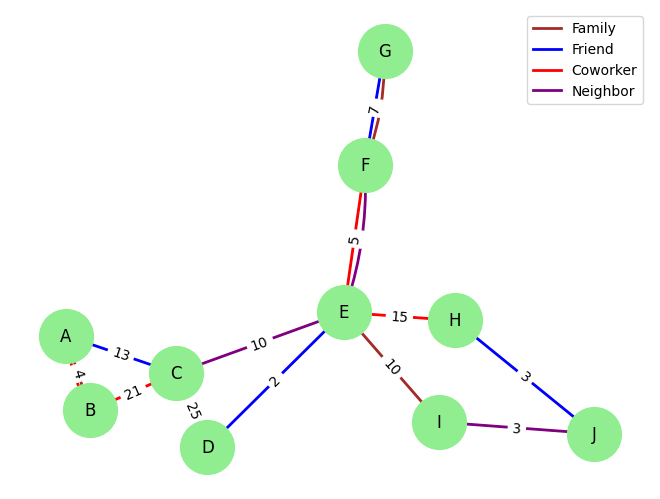

In [17]:

# Create a MultiGraph with different relations and weights
G = nx.MultiGraph()

# Adding multiple edges between some nodes to showcase the MultiGraph feature
G.add_edge('A', 'B', relation='Family', weight=6)
G.add_edge('A', 'B', relation='Coworker', weight=4)  # Additional edge between A and B

G.add_edge('A', 'C', relation='Friend', weight=13)
G.add_edge('B', 'C', relation='Coworker', weight=21)
G.add_edge('C', 'D', relation='Family', weight=25)
G.add_edge('C', 'E', relation='Neighbor', weight=10)
G.add_edge('E', 'D', relation='Friend', weight=2)

G.add_edge('E', 'F', relation='Coworker', weight=10)
G.add_edge('E', 'F', relation='Neighbor', weight=5)  # Additional edge between E and F

G.add_edge('F', 'G', relation='Friend', weight=9)
G.add_edge('F', 'G', relation='Family', weight=7)  # Additional edge between F and G

G.add_edge('I', 'E', relation='Family', weight=10)
G.add_edge('H', 'E', relation='Coworker', weight=15)
G.add_edge('I', 'J', relation='Neighbor', weight=3)
G.add_edge('J', 'H', relation='Friend', weight=3)

# Define edge colors based on the relation attribute
relation_colors = {'Family': 'brown', 'Friend': 'blue', 'Coworker': 'red', 'Neighbor': 'purple'}

# Store edge colors and edge labels (weights)
edge_colors = []
edge_labels = {}

for u, v, key in G.edges(keys=True):
    relation = G[u][v][key]['relation']
    weight = G[u][v][key]['weight']
    
    edge_colors.append(relation_colors[relation])  # Color based on relation
    edge_labels[(u, v, key)] = weight  # Label edge with weight

# Define positions of nodes using spring layout
pos = nx.spring_layout(G)

# Draw the nodes
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=12)

# Draw the multi-edges with a slight curve to differentiate between them
for u, v, key in G.edges(keys=True):
    relation = G[u][v][key]['relation']
    color = relation_colors[relation]
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, edge_color=color,
                           connectionstyle=f'arc3,rad={(0.1 * key)}')  # Arc for multi-edges

# Draw the weight on each edge (key used to ensure proper labeling of multi-edges)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{G[u][v][key]['weight']}" 
                                                 for u, v, key in G.edges(keys=True)}, font_color='black')

# Create a legend for the edge colors
legend_elements = [
    Line2D([0], [0], color='brown', lw=2, label='Family'),
    Line2D([0], [0], color='blue', lw=2, label='Friend'),
    Line2D([0], [0], color='red', lw=2, label='Coworker'),
    Line2D([0], [0], color='purple', lw=2, label='Neighbor')
]

# Add the legend to the plot
plt.legend(handles=legend_elements, loc='best')

# Display the graph
plt.show()


### Bipartite Graphs

A bipartite graph contains two sets of nodes, with edges only between nodes of different sets.


# Checking if a Network is Bipartite

A **bipartite graph** is a graph whose vertices can be divided into two disjoint sets, say $U$ and $V$, such that every edge connects a vertex in $U$ to a vertex in $V$. In simpler terms, there are no edges between vertices within the same set. This can be verified by using the **coloring method** or by **searching for odd cycles**.



![Network Diagram](d.png)



## 1. Coloring Method

The **coloring method** involves attempting to color the graph's nodes using two different colors. Here's how it works:

- Start with any unvisited node and assign it a color, say "color 1".
- Assign the neighboring nodes the opposite color, say "color 2".
- Continue this process for all nodes, coloring each node with the color opposite to its neighbors.
- If at any point, two adjacent nodes are assigned the same color, then the graph is **not bipartite**.

### Example:

Consider the following steps for the coloring method:
- Start with node $A$ and color it with "color 1".
- Color all neighbors of $A$ (nodes connected directly to $A$) with "color 2".
- Then, color all the neighbors of these nodes with "color 1", and so on.
  
If no two adjacent nodes have the same color, the graph is bipartite.

However, if a node is connected to another node with the same color (i.e., two adjacent nodes have the same color), the graph is not bipartite.



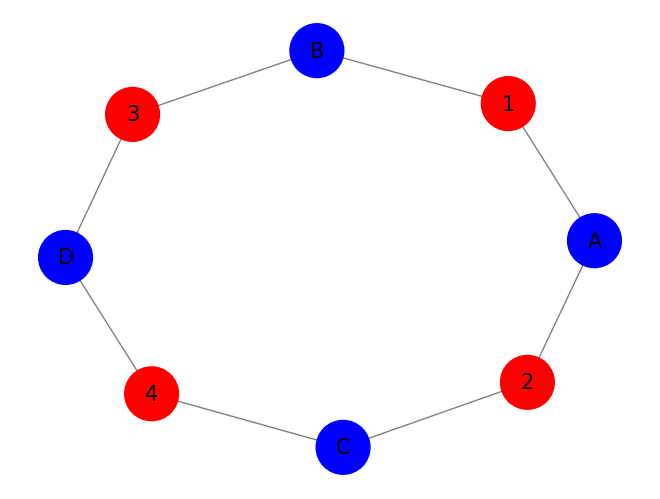

In [20]:
from networkx.algorithms import bipartite
# Create a bipartite graph

B = nx.Graph()
B.add_edges_from([('A', '1'), ('A', '2'), ('B', '1'), ('B', '3'), ('C', '2'), ('C', '4'), ('D', '3'), ('D', '4')])

# Get bipartite sets
X, Y = bipartite.sets(B)

# Color nodes based on their bipartite set
color_map = []
for node in B:
    if node in X:
        color_map.append('blue')
    else:
        color_map.append('red')

# Draw the graph
pos = nx.spring_layout(B)
plt.figure(dpi=100)
nx.draw(B,pos, with_labels=True, node_color=color_map, node_size=1500, edge_color='gray', font_size=15)
plt.show()


![Network Diagram](bi2.png)


## 2. Searching for Odd Cycles

A graph is bipartite **if and only if** it contains **no odd-length cycles**. Here's why:

- In a bipartite graph, any cycle must alternate between the two sets of nodes. Thus, it must have an even number of edges (even-length cycle).
- If there is an odd-length cycle, then the graph cannot be bipartite because such a cycle would force you to assign two adjacent nodes the same color.

### Steps to Check for Odd Cycles:
1. Choose any node and start a **breadth-first search (BFS)** or **depth-first search (DFS)** of the graph.
2. As you traverse the graph, alternate the color of each node.
3. If you find an edge connecting two nodes of the same color, then the graph contains an odd-length cycle, and hence, it is **not bipartite**.
4. If the search completes without such a conflict, the graph is bipartite.

### Example:

Suppose you encounter a cycle with three nodes: $A \rightarrow B \rightarrow C \rightarrow A$. This is an **odd-length cycle** (3 edges), which means the graph cannot be bipartite.

### Summary:

- **Bipartite Graph:** No odd-length cycles, possible to color using two colors.
- **Non-Bipartite Graph:** Presence of odd-length cycles, impossible to color using two colors.

By using either the **coloring method** or **searching for odd cycles**, you can efficiently determine whether a given network is bipartite or not.


Detected cycle: [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')]


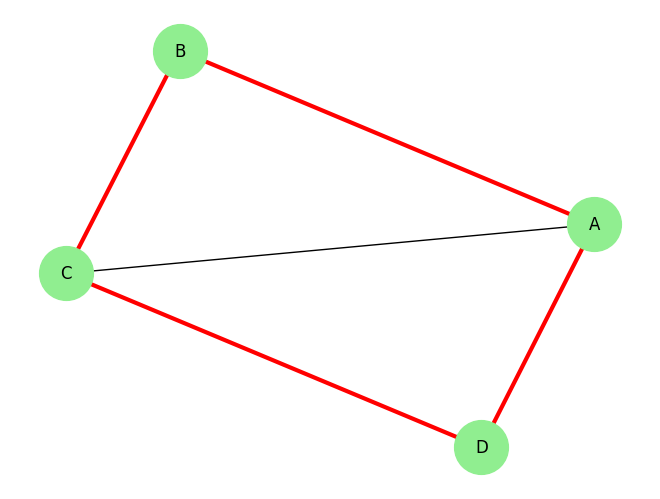

In [10]:
# Create a non-bipartite graph (with an odd-length cycle)
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A'), ('A', 'C')])

# Detect cycle
cycle = list(nx.find_cycle(G))
print(f"Detected cycle: {cycle}")

# Draw the graph with the cycle highlighted
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, edge_color='black')

# Highlight the odd cycle
cycle_edges = [(cycle[i][0], cycle[i][1]) for i in range(len(cycle))]
nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, width=3, edge_color='red')
plt.show()


### Graph Degree and Adjacency Matrix

You can compute the degree of nodes and the adjacency matrix to understand the graph's structure.


![Network Diagram](ad.png)


In [22]:
# Graph Degree
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')])
degree = dict(G.degree())
print("Node degrees:", degree)

# Adjacency Matrix
adj_matrix = nx.adjacency_matrix(G)
print("Adjacency matrix:\n", adj_matrix.todense())


Node degrees: {'A': 2, 'B': 2, 'C': 2, 'D': 2}
Adjacency matrix:
 [[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]


# Clustering in Networks

Clustering refers to the degree to which nodes in a graph tend to cluster together or form tightly knit groups. It helps in understanding the density and cohesiveness of connections within networks. This is an important concept in social network analysis, where closely connected groups (clusters) can indicate communities or groups with shared characteristics.

## Clustering Coefficient

The clustering coefficient of a graph is a measure of how often the neighbors of a node are connected to each other. It is a way to assess how "cliquish" a node’s neighborhood is.

### 1. Local Clustering Coefficient

The local clustering coefficient $C_i$ for a node $i$ is the proportion of the actual connections between the neighbors of $i$ to the possible connections between them. It is defined as:

$$
C_i = \frac{2 \times \text{Number of triangles connected to node } i}{k_i (k_i - 1)}
$$

Where:
- $k_i$ is the degree of node $i$, i.e., the number of neighbors of node $i$.
- A triangle refers to three nodes where each is connected to the other two.

**Note:** The denominator, $k_i (k_i - 1) / 2$, represents the number of possible connections between the neighbors of $i$, while the numerator counts the actual number of such connections.

### 2. Global Clustering Coefficient

The global clustering coefficient (also called the transitivity) is a measure of the overall tendency of a graph to form clusters or cliques. It is defined as the ratio of the number of triangles to the number of connected triples of vertices (two edges with a common node).

$$
C = \frac{3 \times \text{Number of triangles}}{\text{Number of connected triples of vertices}}
$$

Where:
- A **triangle** is a set of three nodes that are mutually connected.
- A **connected triple** consists of three nodes where at least two edges are present.

### 3. Average Clustering Coefficient

The average clustering coefficient $\langle C \rangle$ is the average of the local clustering coefficients of all the nodes in the graph. It measures the typical level of clustering within the entire network. Mathematically, it is represented as:

$$
\langle C \rangle = \frac{1}{N} \sum_{i=1}^{N} C_i
$$

Where:
- $N$ is the total number of nodes in the graph.
- $C_i$ is the local clustering coefficient for node $i$.

### Key Insights:
- **High clustering**: Nodes tend to form tightly connected groups. These clusters can often represent communities.
- **Low clustering**: Nodes are sparsely connected, and the network does not exhibit a strong community structure.

### Applications:
- **Social Networks**: Clustering can indicate the presence of closely-knit groups or communities (e.g., friend groups).
- **Biological Networks**: High clustering often occurs in protein-protein interaction networks, where functional modules are observed.
- **Technological Networks**: In networks like the internet or power grids, clustering can suggest areas with more redundancy or robustness.


Clustering Coefficients for each node:
Node A: 0.6666666666666666
Node B: 0.6666666666666666
Node C: 0.3333333333333333
Node D: 0
Node E: 0.16666666666666666
Node F: 0.3333333333333333
Node G: 0
Node H: 0
Node I: 0
Node J: 0
Node K: 1.0

Average Clustering Coefficient: 0.28787878787878785


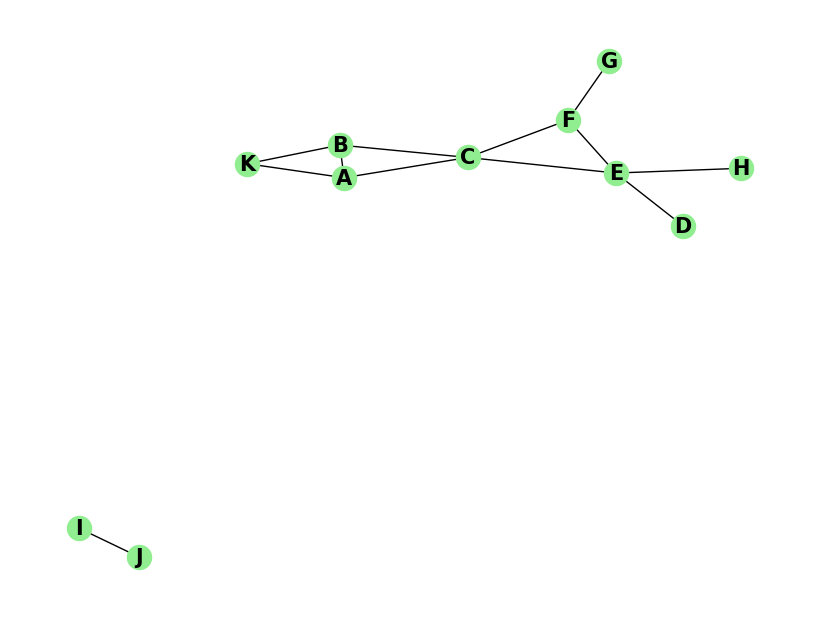

In [12]:
# Creating the graph
G = nx.Graph()

# Adding nodes and edges to the graph based on your specifications
nodes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]
edges = [("A", "B"), ("A", "C"), ("A", "K"), ("B", "C"), 
         ("B", "K"), ("C", "E"), ("C", "F"), ("D", "E"), 
         ("E", "F"), ("F", "G"), ("E", "H"), ("I","J")]

# Adding nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Calculating the clustering coefficient for each node
clustering_coefficients = nx.clustering(G)
print("Clustering Coefficients for each node:")
for node, coeff in clustering_coefficients.items():
    print(f"Node {node}: {coeff}")

# Calculating the average clustering coefficient of the entire graph
average_clustering = nx.average_clustering(G)
print("\nAverage Clustering Coefficient:", average_clustering)

# Plotting the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Positioning the nodes
nx.draw(G, pos, with_labels=True, node_color="lightgreen", font_size=15, font_weight="bold", edge_color="black")
plt.show()


### Transitivity Formula

The transitivity (global clustering coefficient) is defined as:

$$
\text{Transitivity} = \frac{3 \times \text{Number of triangles}}{\text{Number of connected triples of nodes}}
$$

In NetworkX, we can compute the transitivity of a graph using `nx.transitivity()`.


Transitivity of the graph: 0.6


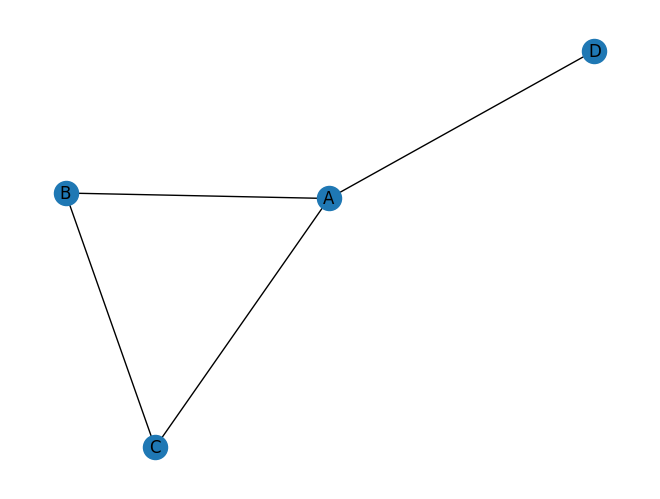

In [23]:
# Example to compute transitivity
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'A'), ('A', 'D')])

# Compute transitivity
transitivity = nx.transitivity(G)
print("Transitivity of the graph:", transitivity)

# Plot the graph
nx.draw(G, with_labels=True)
plt.show()



## Transitivity vs. Average Clustering Coefficient

Both **Transitivity** and **Average Clustering Coefficient (ACC)** measure the tendency for edges to form triangles, but they differ in their emphasis. **Transitivity** places more weight on high-degree nodes, while **ACC** averages over all nodes.

---

![left Graph](left.png) ![Right Graph](right.png) 
---

### top Graph

- Most nodes have high **Local Clustering Coefficient (LCC)**.
- The high-degree node has low **LCC**.

$$
\text{Average Clustering Coefficient} = 0.93
$$

$$
\text{Transitivity} = 0.23
$$

### below Graph

- Most nodes have low **Local Clustering Coefficient (LCC)**.
- The high-degree node has high **LCC**.

$$
\text{Average Clustering Coefficient} = 0.25
$$

$$
\text{Transitivity} = 0.86
$$

---

### Key Differences

- **Transitivity** emphasizes the presence of triangles and places more weight on nodes with high degrees.
- **Average Clustering Coefficient (ACC)** takes an average over all nodes but can overlook the influence of high-degree nodes.


### Thank you for your attention!


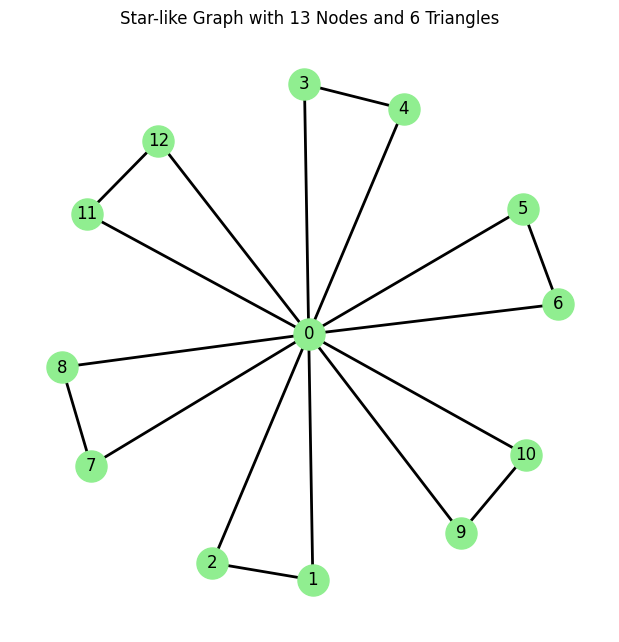

Transitivity of the graph: 0.23076923076923078
Average Clustering Coefficient of the graph: 0.9300699300699301


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph with 13 nodes in total (1 central + 12 peripheral)
G_star_modified = nx.Graph()
G_star_modified.add_node(0)  # Central node

# Connect central node to 12 peripheral nodes
for i in range(1, 13):
    G_star_modified.add_edge(0, i)

# Add edges between peripheral nodes to form exactly 6 triangles
G_star_modified.add_edge(1, 2)
G_star_modified.add_edge(3, 4)
G_star_modified.add_edge(5, 6)
G_star_modified.add_edge(7, 8)
G_star_modified.add_edge(9, 10)
G_star_modified.add_edge(11, 12)

# Draw the graph
pos = nx.spring_layout(G_star_modified, seed=42)  # Layout to position nodes neatly
plt.figure(figsize=(6, 6))
nx.draw(G_star_modified, pos, with_labels=True, node_color='lightgreen', node_size=500, edge_color='black', width=2)
plt.title("Star-like Graph with 13 Nodes and 6 Triangles")
plt.show()

# Calculate transitivity
transitivity = nx.transitivity(G_star_modified)
print("Transitivity of the graph:", transitivity)

# Calculate average clustering coefficient
avg_clustering_coeff = nx.average_clustering(G_star_modified)
print("Average Clustering Coefficient of the graph:", avg_clustering_coeff)


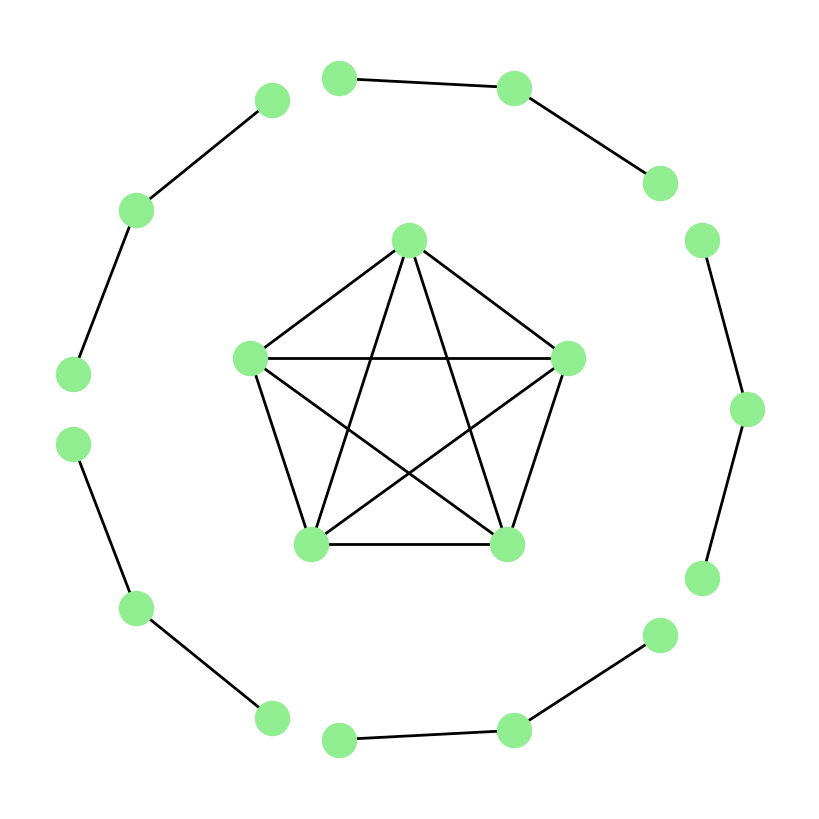

Transitivity: 0.8571428571428571
Average Clustering Coefficient: 0.25


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create the graph
G = nx.Graph()

# Step 1: Add the 5 central nodes (Complete Graph K5)
central_nodes = range(5)
G.add_nodes_from(central_nodes)

# Fully connect the 5 central nodes
for i in central_nodes:
    for j in central_nodes:
        if i < j:
            G.add_edge(i, j)

# Step 2: Add 15 peripheral nodes, grouped around the central nodes
peripheral_offset = 5
for i in range(5):
    # Create 3 peripheral nodes for each central node
    peripheral_1 = peripheral_offset + 3 * i
    peripheral_2 = peripheral_offset + 3 * i + 1
    peripheral_3 = peripheral_offset + 3 * i + 2
    
    # Add edges between them (forming 2 edges between each group of 3)
    G.add_edge(peripheral_1, peripheral_2)
    G.add_edge(peripheral_2, peripheral_3)

# Step 3: Define custom positions with equal angular spacing for peripheral nodes
pos = {
    # Central K5 nodes arranged in a pentagon
    0: (0, 0.5),
    1: (0.47, 0.15),
    2: (0.29, -0.4),
    3: (-0.29, -0.4),
    4: (-0.47, 0.15),
}

# Calculate positions for peripheral nodes around the central nodes
angle_step = 2 * np.pi / 5  # 5 groups
radius = 1  # Distance from the center to the groups

# Assign specific positions for peripheral nodes in an arrowhead shape
for i in range(5):
    angle = i * angle_step  # Central angle for the group
    # Invert the angles to point inward
    for j in range(3):
        # Define the peripheral nodes with inverted angles for inward pointing
        peripheral_node = peripheral_offset + 3 * i + j
        pos[peripheral_node] = (
            radius * np.cos(angle - (j - 1) * (np.pi / 6)),  # Adjust angle to point inward
            radius * np.sin(angle - (j - 1) * (np.pi / 6))
        )

# Step 4: Draw the graph
plt.figure(figsize=(8, 8))

# Draw the graph with node labels
nx.draw(G, pos, with_labels=False, node_color='lightgreen', node_size=600, edge_color='black', width=2)

plt.axis('equal')  # Equal scaling for x and y axes
plt.show()

# Step 5: Calculate transitivity and average clustering coefficient
transitivity = nx.transitivity(G)
avg_clustering = nx.average_clustering(G)

# Print the results
print(f"Transitivity: {transitivity}")
print(f"Average Clustering Coefficient: {avg_clustering}")
